In [1]:
#Projekat ima trostruki zadatak#
    #1. predstaviti odnos programera koji posao obavljaju od kuće, iz prostorija firme ili kombinovano#
    #2. uspostaviti vezu između godina programera (i broja programera) sa Gausovom raspodelom#
    #3. grafički predstaviti razloge iz kojih se ljudi bave programiranjem# 

#U projektu je ćemo demonstrirati filtriranje podataka, njihovu obradu, manipulaciju i vizualizaciju#

#Svi podaci su prikupljeni sa https://stackoverflow.com/#

In [2]:
#Dodajemo biblioteku pandas za rad sa .csv fajlovima i sa tabelama#
#Iz biblioteke matplotlib izdvajamo metod pyplot koji koristimo za crtanje grafika i za vizualizaciju podataka#
#numpy koristimo prilikom Gausove raspodele#
#stats iz biblioteke scipy koristimo kod Normalne raspodele#

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
plt.close("all")

In [3]:
#Otvaramo fajl sa podacima i njegovu šemu#
#Postavljamo opcije da bismo mogli da vidimo više redova i kolona#

df = pd.read_csv("data.csv")
schema_df = pd.read_csv("data_schema.csv")

pd.set_option("display.max_columns",80)
pd.set_option("display.max_rows",80)

In [4]:
#Otvaramo šemu da vidimo koje kolone su nam potrebne#
schema_df.head(20)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
7,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
8,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
9,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


In [5]:
#U sledećim koracima (linije 4,6 i 7) proveravamo da li su 'MainBranch', 'Age' i 'Remote Work' ono što nam treba#

In [6]:
schema_df[schema_df['qname'] == 'MainBranch']['question']

5    Which of the following options best describes ...
Name: question, dtype: object

In [7]:
schema_df[schema_df['qname'] == 'Age']['question']

6    What is your age? *
Name: question, dtype: object

In [8]:
schema_df[schema_df['qname'] == 'RemoteWork']['question']

8    Which best describes your current work situation?
Name: question, dtype: object

In [9]:
#Vršimo čišćenje i izdvajamo kolone koje su nam od značaja#
#Za naše potrebe zadatka, to su 'MainBranch', 'Ag'e i 'RemoteWork'#
#Novodobijenu tabelu nazvaćemo sa df1#

df1 = df.loc[:, ['MainBranch', 'Age', 'RemoteWork']]

In [10]:
#Trenutni izgled tabele#
df1

,MainBranch,Age,RemoteWork
0,None of these,18-24 years old,NaN
1,I am a developer by profession,25-34 years old,Remote
2,I am a developer by profession,45-54 years old,"Hybrid (some remote, some in-person)"
3,I am a developer by profession,25-34 years old,"Hybrid (some remote, some in-person)"
4,I am a developer by profession,25-34 years old,Remote
...,...,...,...
89179,I am a developer by profession,25-34 years old,Remote
89180,I am a developer by profession,18-24 years old,"Hybrid (some remote, some in-person)"
89181,I code primarily as a hobby,Prefer not to say,NaN
89182,I am a developer by profession,Under 18 years old,"Hybrid (some remote, some in-person)"


In [11]:
#Menjamo nazive kolona na srpskom jeziku#
#Konstruišemo 'dictionary' i onda njega primenjujemo na df1#

nazivi_kolona = {'MainBranch':'Profesija',
                 'Age':'Godine',
                 'RemoteWork':'Način rada'}
df1 = df1.rename(columns= nazivi_kolona)

In [12]:
#Zapazimo da su odgovori zabeleženi na engleskom jeziku#
#U svakom redu promenimo ih da budu na srpskom, kako bi nam krajnji rezultat bio na srpskom#
#Prvo to radimo za kolonu "Profesija", nakon za "Godine" i na kraju za "Način rada"#

In [13]:
#Najpre gledamo koje sve vrednosti sadrži kolona "Profesija"#

df1['Profesija'].value_counts()

Profesija
I am a developer by profession                                                           67237
I am not primarily a developer, but I write code sometimes as part of my work/studies     8954
I am learning to code                                                                     4961
I code primarily as a hobby                                                               4960
I used to be a developer by profession, but no longer am                                  1861
None of these                                                                             1211
Name: count, dtype: int64

In [14]:
nazivi_profesija = {'I am a developer by profession':'Programira zbog posla',
                    'I am not primarily a developer, but I write code sometimes as part of my work/studies':'Programira zbog potrebe fakulteta',
                    'I am learning to code':'Uči da programira',
                    'I code primarily as a hobby':'Programira iz hobija', 
                    'I used to be a developer by profession, but no longer am':'Nekada je programiralo ali više ne',
                    'None of these':'Neizjašnjeno'
                   }
df1['Profesija'] = df1['Profesija'].map(nazivi_profesija)

#Primetimo da je ovde dobro da prilikom same ankete i prikupljanja podataka, ispitanicima ponudite odgovore u "scroll list"#
#Razlog tome je da ne dođe do grešaka u kucanju i nagomilavanju 'različitih', a suštinski istih vrednosti#
#Time se pri prikupljanju podataka javlja manji broj grešaka i stoga kasnije ne dolazi do njihovog nagomilavanja#
#Ova anketa je profesionalno sprovedena, tako da ima malo sređivanja#

In [15]:
#Gorenavedeni postupak robavljamo i sa kolonama 'Godine' i 'Način rada' (linije 15,16,17,18)#

In [16]:
df1['Godine'].value_counts()

Godine
25-34 years old       33247
35-44 years old       20532
18-24 years old       17931
45-54 years old        8334
Under 18 years old     4128
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Name: count, dtype: int64

In [17]:
nazivi_godina = {'Under 18 years old':'18-',
                 '18-24 years old':'18-24',
                 '25-34 years old':'25-34',
                 '35-44 years old':'35-44',
                 '45-54 years old':'45-54',
                 '55-64 years old':'55-64',
                 '65 years or older': '65+',
                 'Prefer not to say':'Neizjašnjeno'
                }
df1['Godine'] = df1['Godine'].map(nazivi_godina)

In [18]:
df1['Način rada'].value_counts()

Način rada
Hybrid (some remote, some in-person)    31131
Remote                                  30566
In-person                               12113
Name: count, dtype: int64

In [19]:
nazivi_načina_rada = {'Hybrid (some remote, some in-person)':'Kombinovano',
                     'Remote':'Od kuće',
                     'In-person':'Uživo, u prostorijama firme'
                     }
df1['Način rada'] = df1['Način rada'].map(nazivi_načina_rada)

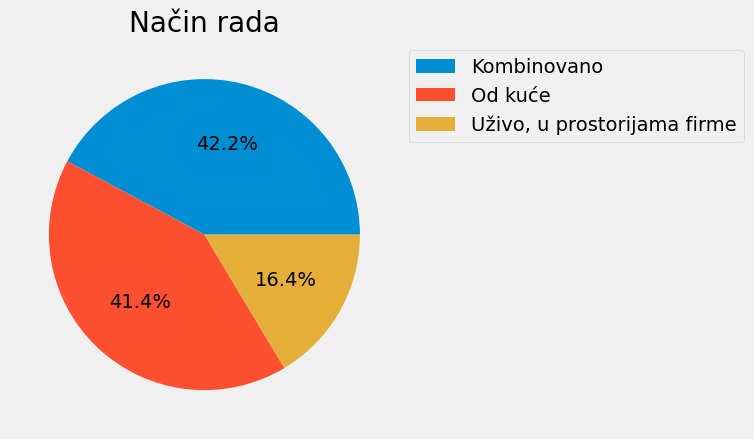

In [20]:
#Grafički prikazujemo odnos programera koji rade od kuće, na poslu ili kombinovano#
#Ubacujemo legendu da bi znali šta svaka boja predstavlja, a zbog toga izbacujemo labels#
#Radi bolje vizualizacije, koristimo %#

plt.style.use('fivethirtyeight')
df1['Način rada'].value_counts().plot(kind = 'pie', 
                                      legend = True, 
                                      autopct = '%1.1f%%', 
                                      labeldistance=None,
                                      )


plt.title('Način rada')
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [21]:
#Izbacujemo one koji se nisu izjasnili povodom godina#
#Ovo radimo jer odnos godina i broja programera želimo da prikažemo brojčano preko trakastog dijagrama#
#Osobe koje se nisu izjasnile nam remete taj koncept#

df1 = df1.loc[df1["Godine"] != 'Neizjašnjeno']

In [22]:
#Sortiramo godine od najmanje ka najvećem#
#Ovo je bitno da bismo kasnije uspostavili veyu sa Gausovom raspodelom#

df1["Godine"].value_counts().sort_index()

Godine
18-       4128
18-24    17931
25-34    33247
35-44    20532
45-54     8334
55-64     3392
65+       1171
Name: count, dtype: int64

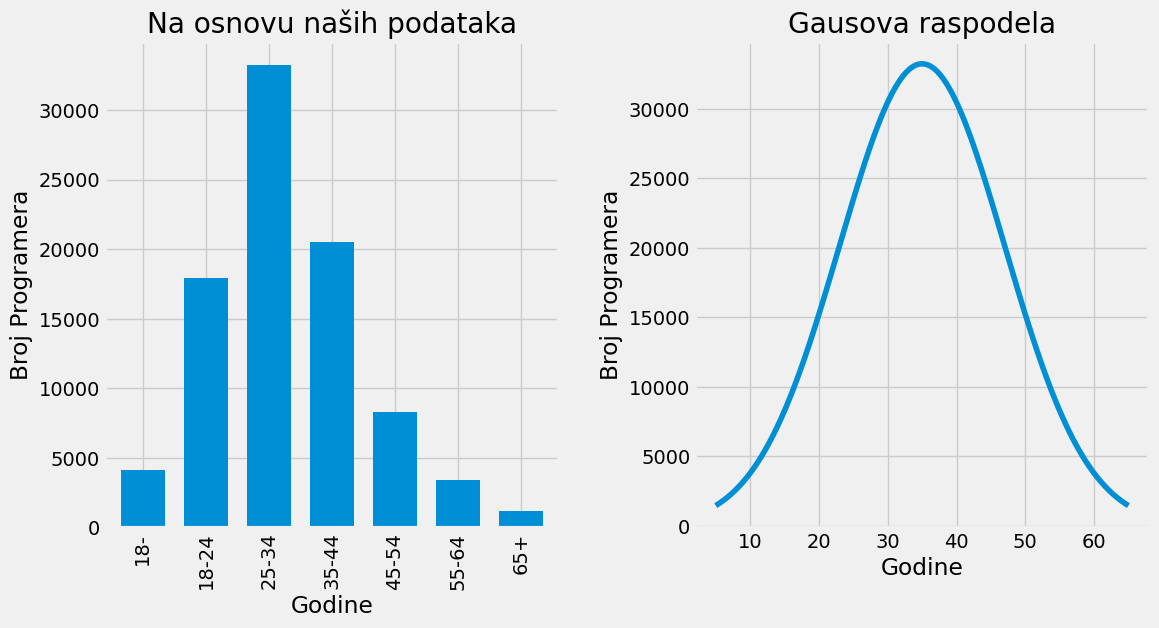

In [23]:
#PREDSTAVLJANJE ODNOSA GODINA I BROJA PROGRAMERA PREKO TRAKASTOG DIJAGRAMA I VEZA S GAUSOVOM RASPODELOM#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
fig.subplots_adjust(wspace=0.3)

#TRAKASTI DIJAGRAM DOBIJEN NA OSNOVU NAŠIH PODATAKA#
df1["Godine"].value_counts().sort_index().plot(ax=ax1, 
                                               kind='bar', 
                                               ylabel="Broj Programera", 
                                               title = "Na osnovu naših podataka", 
                                               width=0.7,
                                              )

#GAUSOVA RASPODELA SA MATEMATIČKIM OČEKIVANJEM 35 I STANDARDNOM DEVIJACIJOM 12#
x_data = np.arange(5, 65, 0.01)
y_data = (stats.norm.pdf(x_data, x_data.mean() , 12))

ax2.plot(x_data, pow(10,6)*y_data)
plt.title("Gausova raspodela")
plt.xlabel("Godine")
plt.ylabel("Broj Programera")

plt.show()

In [24]:
#Umesto normalne, možemo posmatrati i hi-kvadrat raspodelu, budući da je u pitanju rad sa nenegativnim veličinama (godinama)#

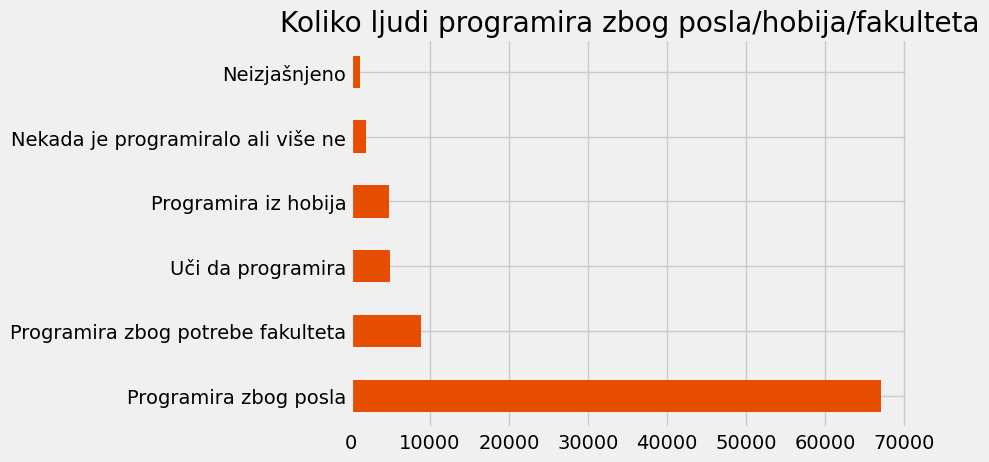

In [25]:
#Na kraju pogledajmo iz kog razloga programiraju ispitanici#

df1['Profesija'].value_counts().plot(kind = 'barh', 
                                     ylabel ='', 
                                     xticks = np.arange(0, 80000, step=10000), 
                                     color = ('#E64D00'), 
                                     title = 'Koliko ljudi programira zbog posla/hobija/fakulteta', 
                                     width=0.5)
plt.show()